In [1]:
import sys
import os
base_dir = os.path.join(os.getcwd(),'../../Pokemon_Generator')
sys.path.append(base_dir)
os.chdir(base_dir)

In [25]:
import torch
from torchvision import transforms
import models.VAE as vae
import Dataset
import matplotlib.pyplot as plt
from configs.config import load_yaml
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47450978..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9293183..1.0].


0.16067553
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09944153e-06 3.39746475e-06 7.15255737e-07]
 [4.30405140e-04 9.47177410e-04 1.26510859e-03]
 [1.43355131e-03 1.65146589e-03 2.15983391e-03]
 [1.38306618e-03 1.84106827e-03 2.03430653e-03]
 [3.33893299e-03 3.80122662e-03 5.43802977e-03]
 [8.57472420e-04 9.97483730e-04 2.12508440e-03]
 [1.98304653e-04 2.67386436e-04 5.62250614e-04]
 [1.28656626e-03 2.30610371e-03 3.58873606e-03]
 [5.37228584e-03 1.02809668e-02 8.97783041e-03]
 [2.27004290e-03 4.49645519e-03 4.41932678e-03]
 [2.92360783e-04 5.27679920e-04 5.21957874e-04]
 [3.59177589e-04 4.52935696e-04 6.89506531e-04]
 [2.89142132e-04 3.27765942e-04 5.54323196e-04]
 [7.55190849e-05 8.54134560e-05 1.92761421e-04]
 [4.52995300e-06 4.47034836e-06 7.86781311e-06]
 [1.02937222e-04 1.04546547e-04 1.88350677e-04]
 [7.39514828e-04 9.09745693e-04 1.06948614e-03]
 [1.33752823e-04 1.90258026e-04 2.61425972e-04]
 [1.95503235e-05 2.22921371e-

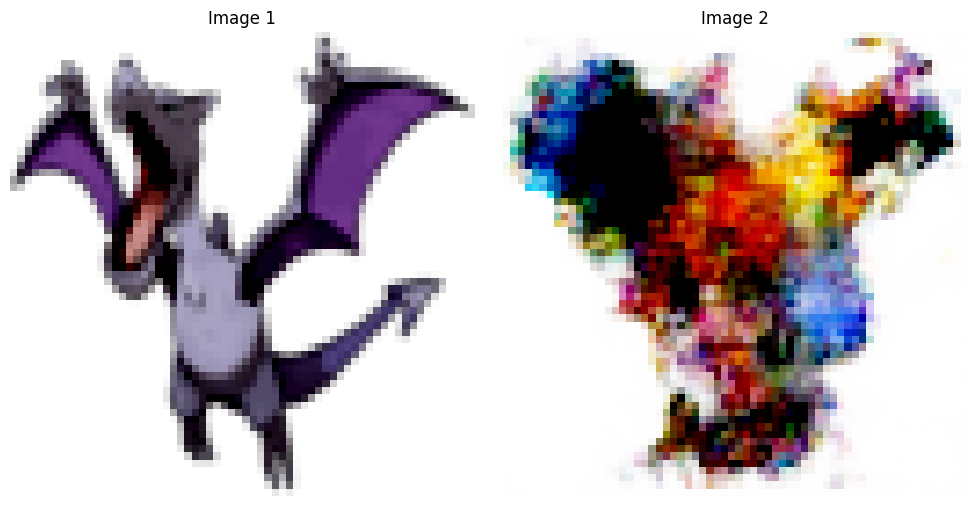

In [109]:
# Assuming vae.VAE() is your PyTorch model
conf = load_yaml('VAE.yaml')
model = vae.VAE(conf)
model.load_state_dict(torch.load('outputs/last.ckpt')['state_dict'])

# Define your transforms correctly
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Adjust your data directory and create the dataset instance
data_dir = conf["data_params"]["data_dir"]
ds = Dataset.ImageDataset(data_dir, transform)

# Load an image from the dataset
img = ds[6]
# Assuming your model expects batches, add a batch dimension
img = img.unsqueeze(0)

# Pass the image through the model
rec_img, _, _, _ = model(img)

# Convert the images to numpy arrays for visualization
img = img[0].permute(1, 2, 0).cpu().numpy()
rec_img = rec_img[0].permute(1, 2, 0).detach().cpu().numpy()
sum = 0
for i in range(3):
    print(np.max(abs(img[i]-rec_img[i])))
    print(abs(img[i]-rec_img[i]))
    sum += np.mean((img[i] - rec_img[i])**2)
print(sum/3)

# Now you can visualize or process img and rec_img as needed
fig, axe = plt.subplots(1, 2, figsize=(10,5))

# Plot first image
axe[0].imshow(img)
axe[0].axis('off')  # Turn off axis labels
axe[0].set_title('Image 1')  # Set title if needed

# Plot second image
axe[1].imshow(rec_img)
axe[1].axis('off')  # Turn off axis labels
axe[1].set_title('Image 2')  # Set title if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()